In [71]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [72]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/olympic.csv' #raw github link
df=pd.read_csv(url)
df.head()

,m100,long,poid,haut,m400,m110,disq,perc,jave,m1500,score
0,-11.25,7.43,15.48,2.27,-48.90,-15.13,49.28,4.7,61.32,-268.95,8488
1,-10.87,7.45,14.97,1.97,-47.71,-14.46,44.36,5.1,61.76,-273.02,8399
2,-11.18,7.44,14.20,1.97,-48.29,-14.81,43.66,5.2,64.16,-263.20,8328
3,-10.62,7.38,15.02,2.03,-49.06,-14.72,44.80,4.9,64.04,-285.11,8306
4,-11.02,7.43,12.92,1.97,-47.44,-14.40,41.20,5.2,57.46,-256.64,8286


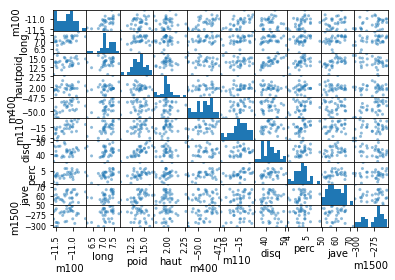

In [73]:
ax1=pd.plotting.scatter_matrix(df.loc[:, 'm100':'m1500'], grid=True) #use loc to remove score column

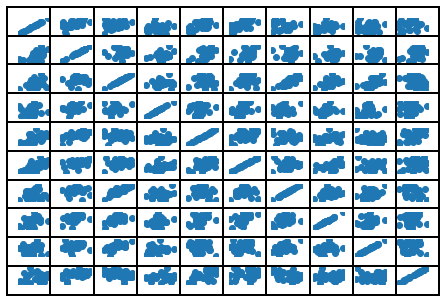

In [74]:
#with for loop scatters
olympic_array=np.array(df.loc[:, 'm100':'m1500'])
num_var=olympic_array.shape[1]

fig, axs = plt.subplots(num_var, num_var)

for i in range(num_var):
    for j in range(num_var):
        axs[i, j].scatter(olympic_array[:, i], olympic_array[:, j])
        axs[i, j].axis('off')
        rect = plt.Rectangle((0.1*i, 0.1*j), 0.10, 0.10, fill=False, color="k", lw=2, zorder=1000, transform=fig.transFigure, figure=fig)
        fig.patches.extend([rect])

plt.tight_layout()
plt.show()

In [75]:
#PCA
X=df.loc[:, 'm100':'m1500']
y=df.loc[:, 'score']

# scale data and fit pca
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

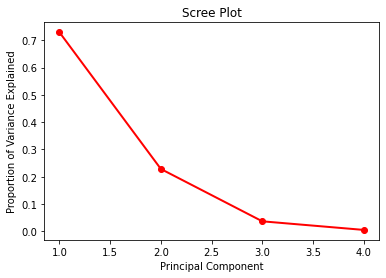

In [86]:
PC_values = np.arange(pca_model.n_components_) + 1
plt.plot(PC_values, pca_model.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [76]:
def biplot_func(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()
    ax.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    ax.grid()
    return(fig, ax)

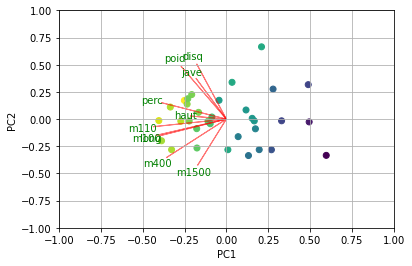

In [80]:
#Call the function with 2 pcs
[fig, ax] = biplot_func(x_new[:, 0:2], np.transpose(pca_model.components_[0:2, :]), labels=df.loc[:, 'm100':'m1500'].columns)

In [81]:
#scores figure
def scores_plot(x_new, y):
    fig, ax = plt.subplots()
    pos1=x_new[:, 0]
    pos2=x_new[:, 1]
    color_score=np.zeros((len(pos1)), )
    for i in range(len(pos1)):
        color_score[i]=(y[i]-min(y))/(max(y)-min(y))
        ax.text(pos1[i], pos2[i], s=y[i])
    ax.scatter(pos1, pos2, c=color_score, cmap='hot')
    return(fig, ax)

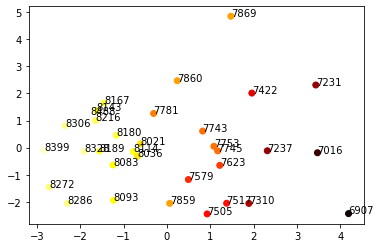

In [82]:
[fig, ax] = scores_plot(x_new, df['score'])

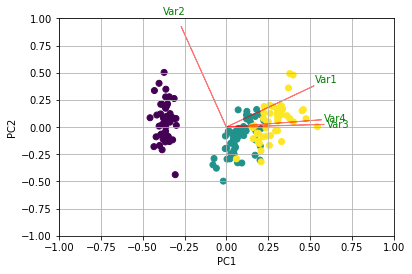

In [83]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# normalise and fit
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

#Call the function. Use only the 2 PCs.
[fig, ax] = biplot_func(x_new[:, 0:2], np.transpose(pca_model.components_[0:2, :]))

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


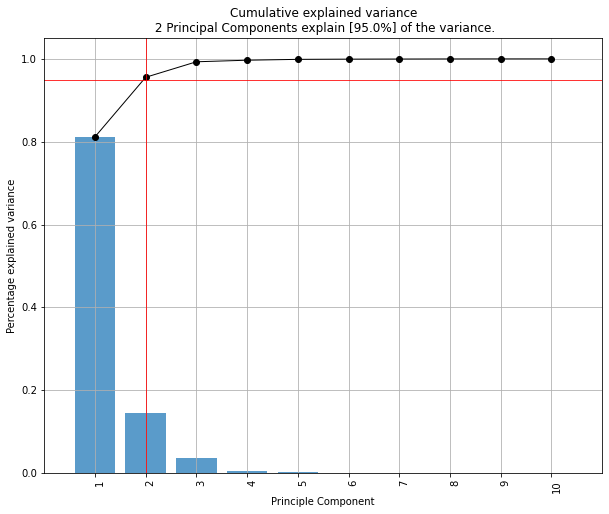

<Figure size 432x288 with 0 Axes>

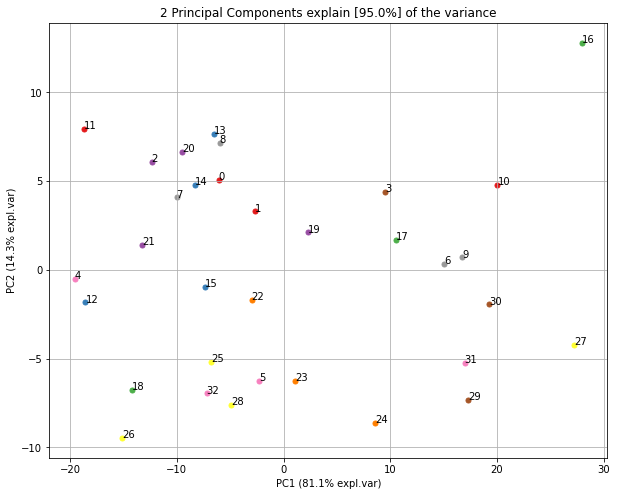

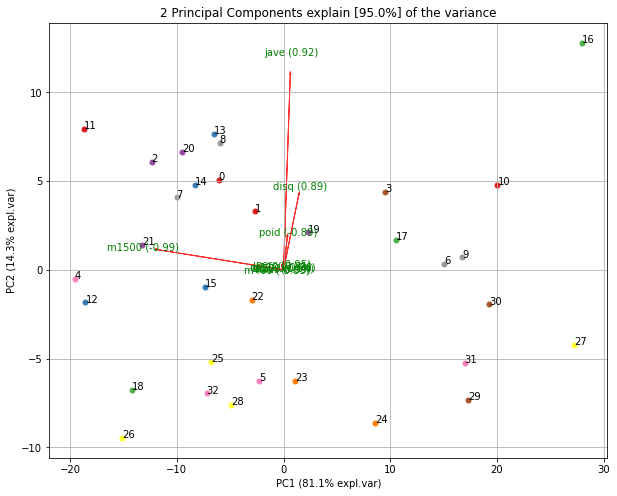

          m100      long      poid      haut      m400      m110      disq  \
PC1  -0.004504 -0.008496  0.029493 -0.000715 -0.045589 -0.005044  0.118406   
PC2   0.005633  0.013772  0.155511  0.002667 -0.001324  0.010836  0.352167   
PC3   0.012629  0.011252  0.205411  0.004594  0.068160  0.031890  0.890689   
PC4  -0.168187 -0.135663 -0.177194 -0.006474 -0.847981 -0.398398  0.119608   
PC5  -0.043526  0.002050 -0.887293  0.000035  0.331802 -0.186480  0.222074   
PC6  -0.116484 -0.274163  0.323120 -0.109920  0.393530 -0.762887 -0.066701   
PC7  -0.103423 -0.001900 -0.053206 -0.000077 -0.012447 -0.298388 -0.007598   
PC8  -0.232522 -0.907864 -0.052946 -0.012676  0.033281  0.333944  0.014718   
PC9   0.943575 -0.280277 -0.056010 -0.050213 -0.082649 -0.121820  0.013015   
PC10  0.030685 -0.057116  0.029798  0.992555  0.033937 -0.089180 -0.010752   

          perc      jave     m1500  
PC1  -0.000343  0.052541 -0.990027  
PC2   0.019704  0.917593  0.095302  
PC3   0.029358 -0.387028  0.08

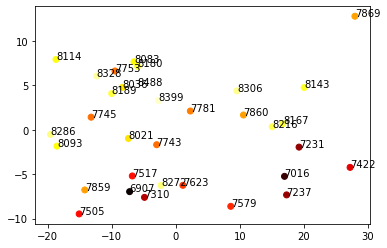

In [42]:
#met pca module
import pca

model = pca.pca(n_components=0.95)
results = model.fit_transform(df.loc[:, 'm100':'m1500'])

fig, ax = model.plot()

fig, ax = model.scatter(legend=False)

fig, ax = model.biplot(n_feat=10, legend=False)

fig, ax=plt.subplots()  
#fig, ax = model.biplot(n_feat=10, legend=False, label=False)
pos1=results['PC']['PC1']
pos2=results['PC']['PC2']
color_score=np.zeros((len(pos1)), )
for i in range(len(pos1)):
    color_score[i]=(df['score'][i]-min(df['score']))/(max(df['score'])-min(df['score']))
    ax.text(pos1[i], pos2[i], s=df['score'][i])
ax.scatter(pos1, pos2, c=color_score, cmap='hot')

print(results['loadings'])